<h1> 5. Treniranje modela </h1>

U ovoj bilježnici treniramo XGBoost model na izlazu bilježnice "feature_engineering". Također ćemo dodatno isprobati metodu oversampling zbog nebalansiranosti skupa za testiranje. 

Napravit ćemo i pretraživanje parametara za parametre "max_depth", "min_child_weight" i "gamma" XGB klasifikatora.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
## BRISE UPOZORENJA
import warnings
warnings.filterwarnings('ignore')

In [8]:
## UČITAVANJE TRAIN I TEST SKUPA
X_train = pd.read_hdf('X_train_ft1.h5' , key = 'X_train_ft1')
X_test = pd.read_hdf('X_test_ft1.h5', key = 'X_test_ft1')
y_train = X_train['PRIJEVREMENI_RASKID'].ravel()
X_train.drop(['PRIJEVREMENI_RASKID'], axis = 1, inplace = True)


<h3> Oversampling </h3>

In [34]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# concatenate our training data back together
X = pd.read_hdf('X_train_ft1.h5' , key = 'X_train_ft1')
# separate minority and majority classes
neraskidi = X[X['PRIJEVREMENI_RASKID']==0]
raskidi = X[X['PRIJEVREMENI_RASKID']==1]

# upsample minority
raskidi_upsampled = resample(raskidi,
                          replace=True, # sample with replacement
                          n_samples= len(neraskidi), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([neraskidi, raskidi_upsampled])

# check new class counts
upsampled['PRIJEVREMENI_RASKID'].value_counts()

1    2714201
0    2714201
Name: PRIJEVREMENI_RASKID, dtype: int64

In [35]:
y_train = upsampled['PRIJEVREMENI_RASKID']
X_train = upsampled.drop(['PRIJEVREMENI_RASKID'], axis = 1)

<h3> XGBoost </h3>

XGBoost je algoritam koji je nedavno postao domninantan u primjeni strojnog učenja na raznim natjecanjima zbog svoje brzine i performansa. Implementacija je gradient boosting-a sa stablima odlučivanja.

In [5]:
## ukoliko nije instaliran
!pip install xgboost

In [ ]:
import xgboost as xgb

In [7]:
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

In [8]:
train_model1 = model1.fit(X_train, y_train)
train_model2 = model2.fit(X_train, y_train)

In [ ]:
pred1 = train_model1.predict(X_test)
pred2 = train_model2.predict(X_test)

In [ ]:
y_test = pred1
y_test = np.where(y_test==0,'N','Y')
student = pd.read_excel('eval_dataset_nan.xlsx')
student['PRIJEVREMENI_RASKID'] = y_test
student.to_csv('student.csv')

In [ ]:
y_test = pred2
y_test = np.where(y_test==0,'N','Y')
student = pd.read_excel('eval_dataset_nan.xlsx')
student['PRIJEVREMENI_RASKID'] = y_test
student.to_csv('student.csv')

<h4> Hyperparameter tuning </h4>

U ovom dijelu ćemo isprobati odabrati najbolje parametre 'max_depth', 'min_child_weight' i 'gamma'.

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
rez = {'Accuracy': make_scorer(accuracy_score)}


param_test = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=200, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test, scoring=rez, n_jobs=4,iid=False, refit = 'Accuracy' ,cv=5)

train_model4 = gsearch.fit(X_train, y_train)
pred4 = train_model4.predict(X_test)

NameError: name 'xgb' is not defined

In [ ]:
gsearch.best_params_ # najbolji parametri

In [ ]:
gsearch.best_score_ # najbolji rezultat 

In [29]:
##ISPIS RJESENJA
y_test = pred4
y_test = np.where(y_test==0,'N','Y')
student = pd.read_excel('eval_dataset_nan.xlsx')
student['PRIJEVREMENI_RASKID'] = y_test
student.to_csv('student.csv')

In [ ]:
param_test2b = {
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=200, max_depth=4,
 min_child_weight=5,  gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring=rez, refit = 'Accuracy',n_jobs=4,iid=False, cv=5)

train_model5 = gsearch2b.fit(X_train, y_train)
pred5 = train_model5.predict(X_test)

In [ ]:
gsearch2b.best_params_

In [ ]:
gsearch2b.best_score_

In [14]:
##ISPIS RJESENJA
y_test = pred5
y_test = np.where(y_test==0,'N','Y')
student['PRIJEVREMENI_RASKID'] = y_test
student.to_csv('student.csv')

In [ ]:
#Tune Gamma
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring=rez, refit = 'Accuracy',n_jobs=4,iid=False, cv=5)

train_model6 = gsearch3.fit(X_train, y_train)
pred6 = train_model6.predict(X_test)



In [23]:
gsearch3.best_params_

{'gamma': 0.0}

In [36]:
xgb = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=200,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = xgb.fit(X_train, y_train)
pred7 = train_model7.predict(X_test)

In [37]:
#ISPIS RJESENJA
y_test = pred7
y_test = np.where(y_test==0,'N','Y')
student = pd.read_excel('eval_dataset_nan.xlsx')
student['PRIJEVREMENI_RASKID'] = y_test
student.to_csv('student.csv')

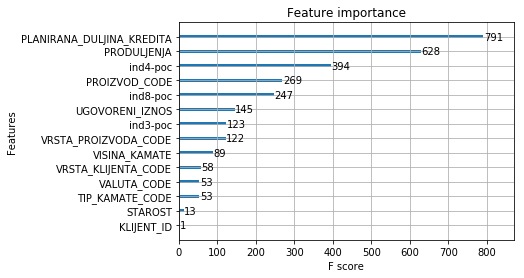

In [33]:
from xgboost import plot_importance
plot_importance(train_model7)